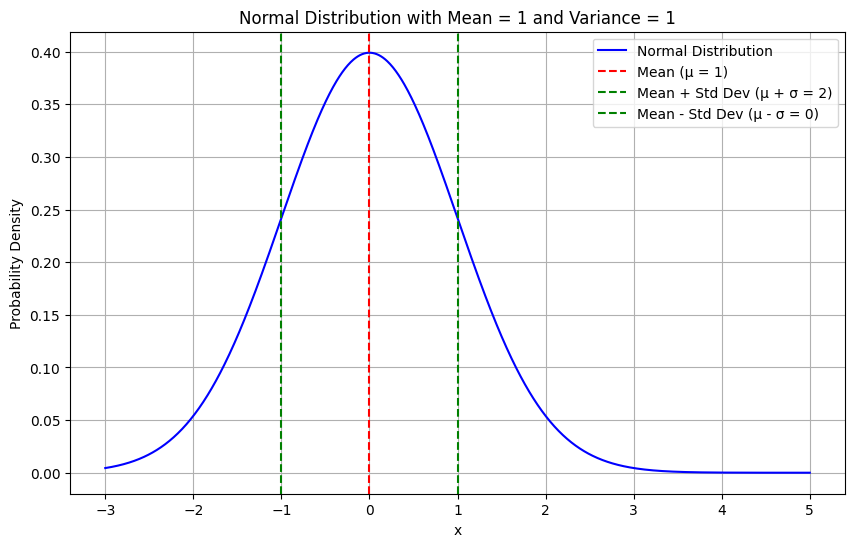

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the normal distribution
mu = 0      # Mean
sigma = 1   # Standard deviation (sqrt of variance)

# Generate x values
x = np.linspace(-3, 5, 1000)

# Generate the probability density function (PDF)
pdf = stats.norm.pdf(x, mu, sigma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.title('Normal Distribution with Mean = 1 and Variance = 1')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='--', label='Mean (μ = 1)')
plt.axvline(mu + sigma, color='green', linestyle='--', label='Mean + Std Dev (μ + σ = 2)')
plt.axvline(mu - sigma, color='green', linestyle='--', label='Mean - Std Dev (μ - σ = 0)')
plt.legend()
plt.grid()
plt.show()

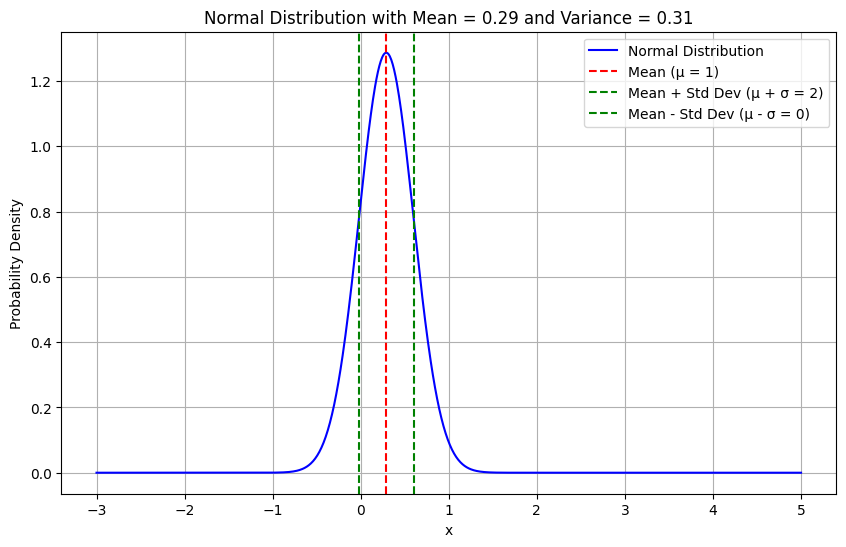

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the normal distribution
mu = 0.29      # Mean
sigma = 0.31   # Standard deviation (sqrt of variance)

# Generate x values
x = np.linspace(-3, 5, 1000)

# Generate the probability density function (PDF)
pdf = stats.norm.pdf(x, mu, sigma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.title('Normal Distribution with Mean = 0.29 and Variance = 0.31')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='--', label='Mean (μ = 1)')
plt.axvline(mu + sigma, color='green', linestyle='--', label='Mean + Std Dev (μ + σ = 2)')
plt.axvline(mu - sigma, color='green', linestyle='--', label='Mean - Std Dev (μ - σ = 0)')
plt.legend()
plt.grid()
plt.show()

In [5]:
import tiktoken
import torch
import torch.nn as nn
text = "Everything everywhere all at once" 

tokenisor = tiktoken.get_encoding("cl100k_base")
token_id  = torch.tensor(tokenisor.encode(text), dtype=torch.long)


token_id.shape

torch.Size([5])

In [25]:
text = "Every effort moves on"
for char in text:
    print(char)

len(set(text))

E
v
e
r
y
 
e
f
f
o
r
t
 
m
o
v
e
s
 
o
n


12

In [4]:
vocab_size = 50257 # the sixe of the vocabulary 
embed_dim = 768 # 768 dimension which reprsents the features of each token

embedding_layer  = nn.Embedding(vocab_size,embed_dim)
embedding_vect = embedding_layer(token_id)
embedding_vect
print(f'the embeddingvector:{embedding_vect}')
print(f'the embeddingvector:{embedding_vect.shape}')


# how to it is trained

the embeddingvector:tensor([[ 2.5418,  0.7812,  0.4591,  ..., -1.1818,  1.1454, -0.2394],
        [ 1.0383,  0.4248, -0.1896,  ..., -0.8444,  2.1425,  0.0775],
        [-0.6366, -0.6875,  0.7767,  ..., -0.0055, -0.4142,  0.0782],
        [-0.0469,  0.5380,  1.1711,  ..., -0.4268, -0.3612,  1.1108],
        [ 1.3532, -1.9834,  1.0967,  ...,  2.4780, -1.3684,  0.0378]],
       grad_fn=<EmbeddingBackward0>)
the embeddingvector:torch.Size([5, 768])


In [24]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], 
   [0.55, 0.87, 0.66], # 
   [0.57, 0.85, 0.64],
   [0.22, 0.58, 0.33], 
   ] # step     (x^6)
)

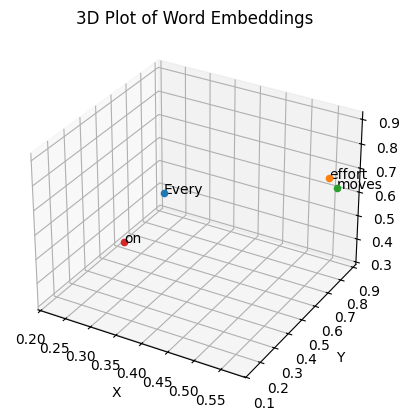

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Every', 'effort', 'moves', 'on']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

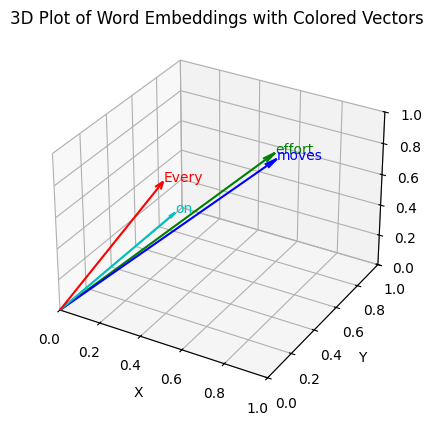

In [26]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


In [4]:
seq_len =4
position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1)

In [8]:
position.shape
embed_dim = 768

In [13]:
pe = torch.zeros(seq_len, embed_dim)
pe
import math

In [14]:
div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim
                                                                           ))

In [16]:
div_term.shape

torch.Size([384])

In [17]:
pe[:, 0::2] = torch.sin(position * div_term)

In [20]:
pe

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.4147e-01, 0.0000e+00, 8.2843e-01,  ..., 0.0000e+00, 1.0243e-04,
         0.0000e+00],
        [9.0930e-01, 0.0000e+00, 9.2799e-01,  ..., 0.0000e+00, 2.0486e-04,
         0.0000e+00],
        [1.4112e-01, 0.0000e+00, 2.1109e-01,  ..., 0.0000e+00, 3.0728e-04,
         0.0000e+00]])

In [21]:
pe[:, 1::2] = torch.cos(position * div_term)

In [22]:
pe = pe.unsqueeze(0) 

In [23]:
pe.shape

torch.Size([1, 4, 768])